In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
file_path_rn = './2024-11-06T17_45_41.766656800Z_0_Resting-Normal.csv'
file_path_ra = './2024-11-06T18_21_14.382059100Z_1_Resting-Abnormal.csv'
file_path = './2024-11-06T18_39_36.900749300Z_2_Working-Normal.csv'
file_path = './2024-11-10T16_21_33.583212800Z_3_Working-Abnormal.csv'
ecg_data = pd.read_csv(file_path)
ecg_data = ecg_data[ecg_data["Time"] <= 120]

In [3]:
def get_data(file_path):
    ecg_data = pd.read_csv(file_path)
    ecg_data = ecg_data[ecg_data["Time"] <= 120]
    # Extract rows with R-peaks (Peak == 3)
    r_peaks = ecg_data[ecg_data['Peak'] == 3]
    
    # Calculate RR intervals in milliseconds
    r_peaks['RR_interval'] = r_peaks['Time'].diff() * 1000  # Convert seconds to milliseconds
    
    # Drop the first RR interval as it will be NaN
    r_peaks = r_peaks.dropna(subset=['RR_interval'])
    
    # Prepare data for the Point Care plot
    rr_intervals = r_peaks['RR_interval'].values
    rr_intervals_x = rr_intervals[:-1]
    rr_intervals_y = rr_intervals[1:]
    return rr_intervals_x, rr_intervals_y

/var/folders/tm/74_p0_ns3hvf_820x8ndnlhm0000gp/T/ipykernel_67308/2591086379.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_peaks['RR_interval'] = r_peaks['Time'].diff() * 1000  # Convert seconds to milliseconds
/var/folders/tm/74_p0_ns3hvf_820x8ndnlhm0000gp/T/ipykernel_67308/2591086379.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_peaks['RR_interval'] = r_peaks['Time'].diff() * 1000  # Convert seconds to milliseconds
/var/folders/tm/74_p0_ns3hvf_820x8ndnlhm0000gp/T/ipykernel_67308/873861753.p

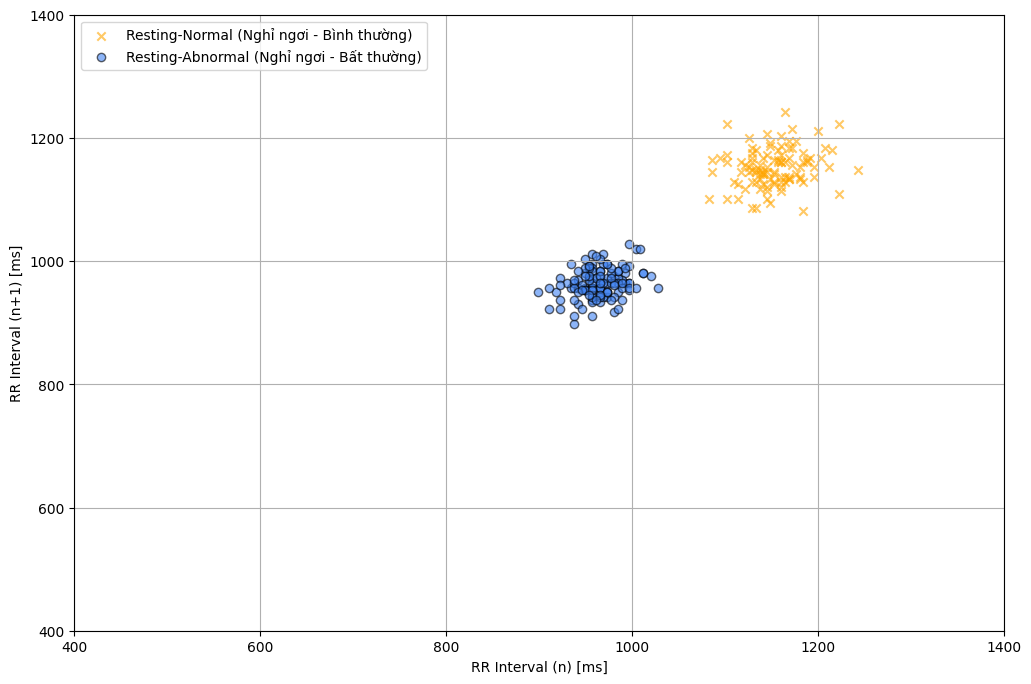

In [25]:
file_path_rn = './2024-11-06T17_45_41.766656800Z_0_Resting-Normal.csv'
file_path_ra = './2024-11-06T18_21_14.382059100Z_1_Resting-Abnormal.csv'

rr_intervals_x_rn, rr_intervals_y_rn = get_data(file_path_rn)
rr_intervals_x_ra, rr_intervals_y_ra = get_data(file_path_ra)
xmin, xmax = 400, 1400
ymin, ymax = xmin, xmax  # Keep the plot square for better visualization

plt.figure(figsize=(12, 8))
plt.scatter(rr_intervals_x_rn, rr_intervals_y_rn, alpha=0.6, edgecolor='k', color='orange', marker='x', label="Resting-Normal (Nghỉ ngơi - Bình thường)")
plt.scatter(rr_intervals_x_ra, rr_intervals_y_ra, alpha=0.6, edgecolor='k', color='#4285f4', marker='o', label="Resting-Abnormal (Nghỉ ngơi - Bất thường)")
# plt.title("Point Care Plot of RR Intervals")

# Set grid with 30x30 intervals
# grid_spacing = (1400-400)/30
# plt.xticks(np.arange(xmin, xmax + grid_spacing, grid_spacing))
# plt.yticks(np.arange(ymin, ymax + grid_spacing, grid_spacing))
# plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.xlabel("RR Interval (n) [ms]")
plt.ylabel("RR Interval (n+1) [ms]")
plt.grid(True)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.legend(title="", loc='upper left')
plt.show()
